In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
le = preprocessing.LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
#Let's open csv
data_raw = pd.read_csv('cinema1.csv')
data = data_raw.copy()
data.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0


In [3]:
#number of rows
data.shape[0]

5050

In [4]:
#number of columns
data.shape[1]

32

In [5]:
#define % nan in rows
(data.isnull().sum(axis = 1)/data.shape[1])*100

0        3.125
1        3.125
2        3.125
3        3.125
4       46.875
         ...  
5045    15.625
5046    18.750
5047    15.625
5048     9.375
5049     3.125
Length: 5050, dtype: float64

In [6]:
# changing data - dropping rows where > 15% nans
data = data.drop(data[(data.isnull().sum(axis = 1)/data.shape[1])*100 > 15].index)

In [7]:
# define % nan in columns
(data.isnull().sum()/data.shape[0])*100

Unnamed: 0                    0.000000
color                         0.185452
director_name                 0.000000
num_critic_for_reviews        0.329693
duration                      0.020606
director_facebook_likes       0.000000
actor_3_facebook_likes        0.123635
actor_2_name                  0.000000
actor_1_facebook_likes        0.000000
gross                        14.527097
genres                        0.000000
actor_1_name                  0.000000
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.123635
facenumber_in_poster          0.226664
plot_keywords                 1.710282
movie_imdb_link               0.000000
num_user_for_reviews          0.020606
language                      0.123635
country                       0.020606
content_rating                3.976921
budget                        7.356274
title_year                    0.000000
actor_2_facebook_likes   

In [8]:
# there are too many nans in a column 'Unnamed: 28', so delete it
# 'Unnamed: 0' is not usuful - just an index
del data['Unnamed: 28']
del data['Unnamed: 0']

In [9]:
# I think we can call it RULE 3 SIGMA
data['imdb_score'].mean() -  3 * data['imdb_score'].std()

1.2872679709656216

In [10]:
# there is score 98.0, let's delete it with using rule 3 sigma
data['imdb_score'].value_counts()

6.7     217
6.6     194
7.2     188
6.5     185
7.0     183
6.4     182
6.8     179
7.3     177
7.1     176
6.1     175
6.2     173
6.3     171
6.9     171
5.9     143
7.4     138
6.0     129
7.5     124
5.8     122
7.6     118
5.7     116
5.6     112
7.7     106
7.8     101
5.4     100
5.5      98
5.3      91
8.0      75
5.2      67
5.1      67
7.9      66
8.1      63
4.9      50
4.8      49
5.0      38
4.6      38
8.2      36
8.3      35
4.3      30
4.5      28
4.7      28
4.1      26
4.4      25
8.4      23
8.5      21
4.2      20
3.3      17
4.0      17
3.9      14
3.8      14
3.6      14
3.5      13
8.6      11
3.4      10
3.7       9
8.7       8
3.1       8
2.8       7
3.2       6
2.7       6
8.9       5
8.8       5
3.0       4
2.9       3
1.9       3
2.1       3
2.2       3
2.3       3
2.4       2
2.6       2
2.5       2
2.0       2
9.0       2
1.6       1
9.3       1
98.0      1
9.9       1
1.7       1
9.2       1
Name: imdb_score, dtype: int64

In [11]:
# use rule 3 sigma for 'imdb_score'
data = data.drop(data[data['imdb_score'] > (data['imdb_score'].mean() +  3 * data['imdb_score'].std()) ].index)
data = data.drop(data[data['imdb_score'] < (data['imdb_score'].mean() -  3 * data['imdb_score'].std()) ].index)

In [12]:
# check that there is no 98.0 now
data['imdb_score'].value_counts()

6.7    217
6.6    194
7.2    188
6.5    185
7.0    183
6.4    182
6.8    179
7.3    177
7.1    176
6.1    175
6.2    173
6.3    171
6.9    171
5.9    143
7.4    138
6.0    129
7.5    124
5.8    122
7.6    118
5.7    116
5.6    112
7.7    106
7.8    101
5.4    100
5.5     98
5.3     91
8.0     75
5.2     67
5.1     67
7.9     66
8.1     63
4.9     50
4.8     49
4.6     38
5.0     38
8.2     36
8.3     35
4.3     30
4.7     28
4.5     28
4.1     26
4.4     25
8.4     23
8.5     21
4.2     20
3.3     17
4.0     17
3.6     14
3.9     14
3.8     14
3.5     13
8.6     11
3.4     10
3.7      9
8.7      8
3.2      6
8.8      5
8.9      5
9.0      2
9.3      1
9.9      1
9.2      1
Name: imdb_score, dtype: int64

In [13]:
# let's check 'gross', see some strange things (162.0 - hmmmm)
data['gross'].value_counts()

177343675.0    3
47000000.0     3
5773519.0      3
218051260.0    3
8000000.0      3
              ..
2268296.0      1
217387997.0    1
17474107.0     1
8104069.0      1
162.0          1
Name: gross, Length: 3994, dtype: int64

In [14]:
# let's drop some data
data = data.drop(data[data['gross'] > (data['gross'].mean() +  3 * data['gross'].std()) ].index)
data = data.drop(data[data['gross'] < (data['gross'].mean() -  3 * data['gross'].std()) ].index)

In [15]:
# let's check 'movie_facebook_likes'
data['movie_facebook_likes'].value_counts()

0         2106
1000       104
11000       80
10000       78
12000       61
          ... 
897          1
905          1
175000       1
921          1
617          1
Name: movie_facebook_likes, Length: 833, dtype: int64

In [16]:
# DROP
data = data.drop(data[data['movie_facebook_likes'] > (data['movie_facebook_likes'].mean() +  3 * data['movie_facebook_likes'].std()) ].index)
data = data.drop(data[data['movie_facebook_likes'] < (data['movie_facebook_likes'].mean() -  3 * data['movie_facebook_likes'].std()) ].index)

In [17]:
#fill all nans my mean value in a column
data = data.fillna(data.mean())

In [18]:
# here we split genres - now we can see 4 Avatar, but with different genres
data_split = (data.set_index(data.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_split.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,0,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,1,Adventure
2,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,2,Fantasy
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,0,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,1,Adventure


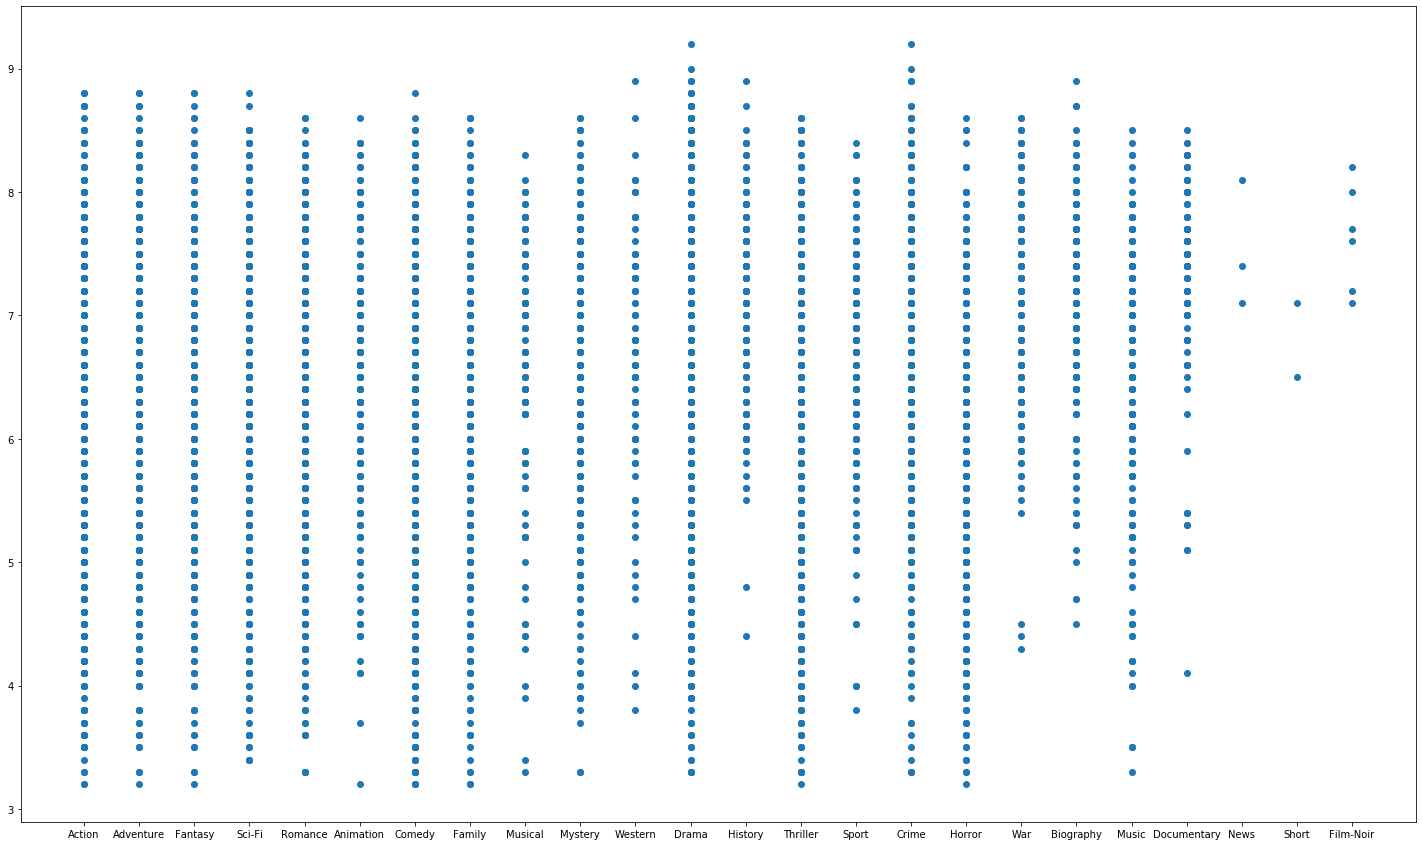

In [19]:
# 'genres' & 'imdb_score'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['imdb_score'])

In [20]:

#data_split['genres']
data_split['imdb_score'][data_split['genres']=='Action'].median()

6.3

In [21]:

#data_split['genres']
data_split['imdb_score'][data_split['genres']=='Film-Noir'].median()

7.65

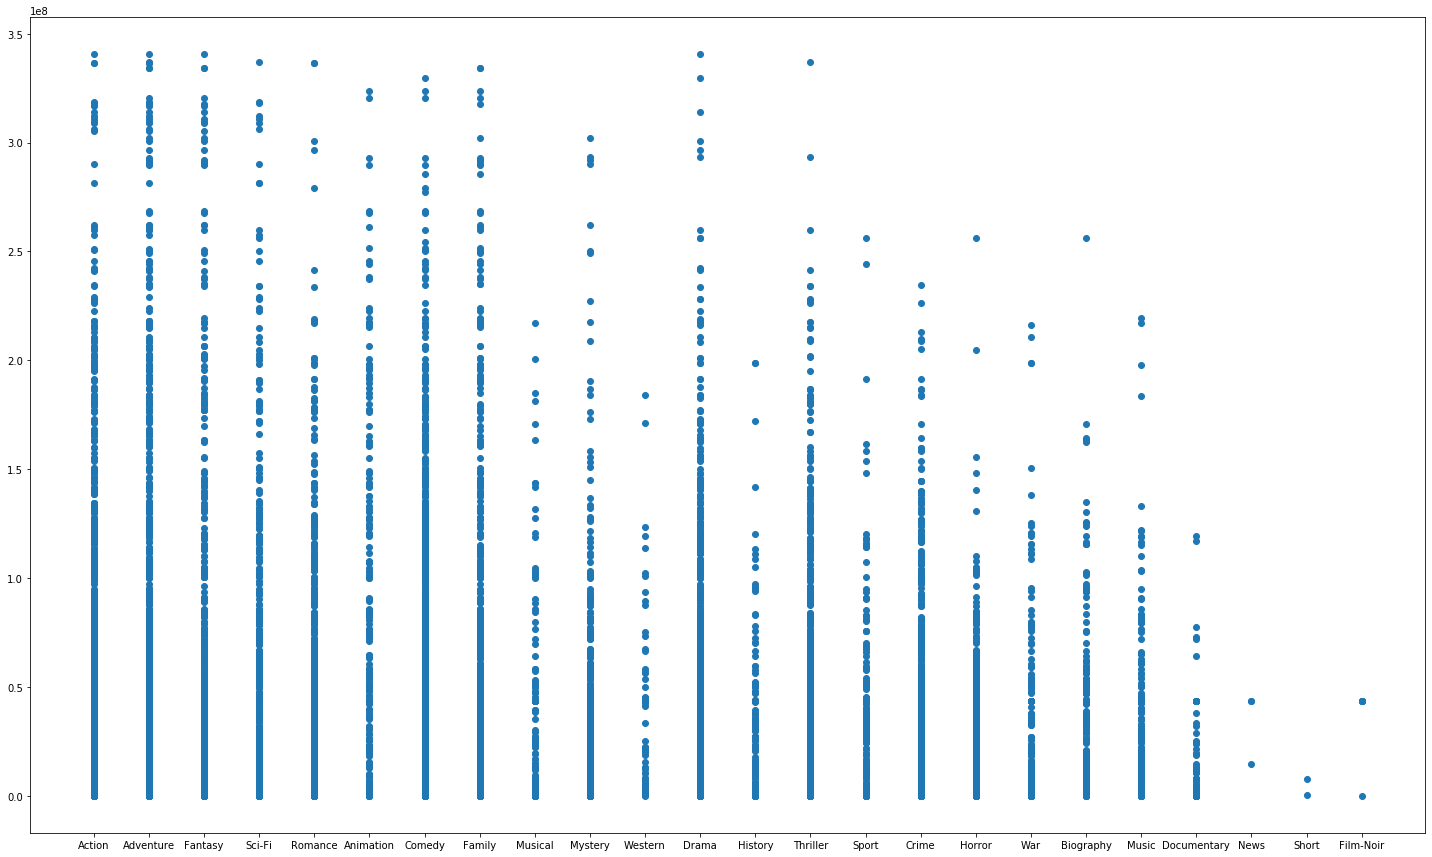

In [22]:
# 'genres' & 'gross'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['gross'])

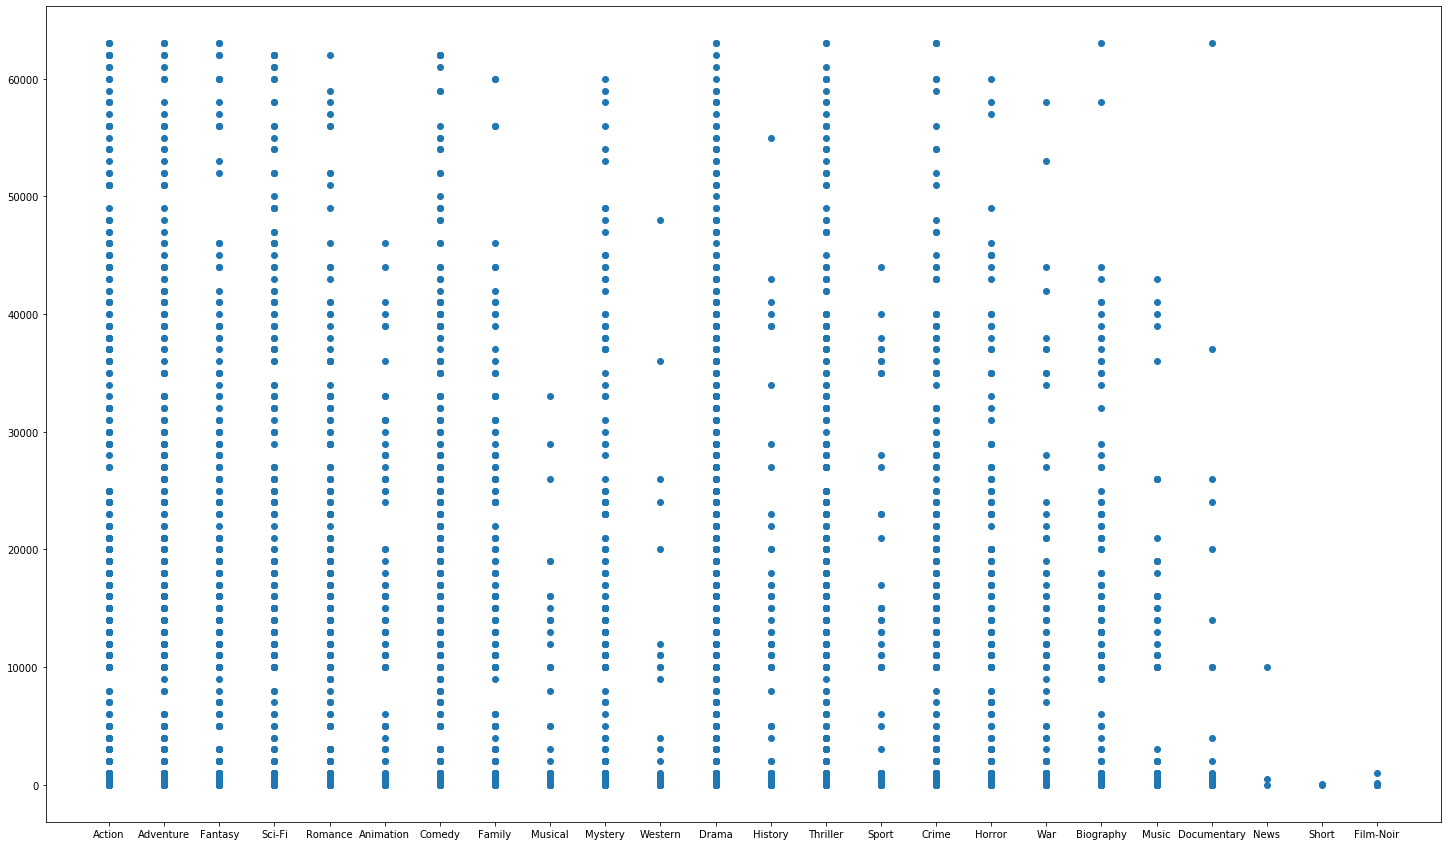

In [23]:
# 'genres' & 'movie_facebook_likes'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['movie_facebook_likes'])

In [24]:
# 3rd task - find coutry with the best mean score
meanData = data.groupby(['country'])['imdb_score'].agg('mean')
meanData.sort_values(ascending=False)

country
Kyrgyzstan            8.700000
Libya                 8.400000
Egypt                 8.100000
Soviet Union          8.100000
Iran                  7.725000
Israel                7.633333
Indonesia             7.600000
Argentina             7.500000
Colombia              7.500000
Afghanistan           7.400000
Sweden                7.400000
New Zealand           7.338462
Brazil                7.275000
West Germany          7.266667
Finland               7.200000
Panama                7.200000
Denmark               7.172727
Taiwan                7.150000
Italy                 7.055000
Greece                7.000000
Czech Republic        6.966667
Japan                 6.950000
Netherlands           6.940000
Dominican Republic    6.900000
Chile                 6.900000
Iceland               6.900000
Mexico                6.812500
Spain                 6.796875
UK                    6.788321
India                 6.748148
France                6.742069
Hong Kong             6.741176


In [25]:
# checking 3rd - I think it's okay
n = data.groupby(['country', 'imdb_score'])['imdb_score'].count()
n.head(10)

country      imdb_score
Afghanistan  7.4           1
Argentina    6.7           1
             7.2           1
             7.9           1
             8.2           1
Aruba        4.8           1
Australia    4.8           1
             4.9           1
             5.1           1
             5.2           2
Name: imdb_score, dtype: int64

In [26]:
# I think it can be 2nd task
n = data.groupby(['actor_1_name', 'director_name', 'movie_title'])['gross'].agg('mean')
n = n.sort_values(ascending=False)
n.head(20)

actor_1_name       director_name     movie_title                                            
Christopher Lee    Peter Jackson     The Lord of the Rings: The Two Towers                      340478898.0
Jennifer Lawrence  Francis Lawrence  The Hunger Games: Mockingjay - Part 1                      337103873.0
J.K. Simmons       Sam Raimi         Spider-Man 3                                               336530303.0
Johnny Depp        Tim Burton        Alice in Wonderland                                        334185206.0
Tom Hanks          Robert Zemeckis   Forrest Gump                                               329691196.0
Steve Coogan       Yarrow Cheney     The Secret Life of Pets                                    323505540.0
Justin Timberlake  Chris Miller      Shrek the Third                                            320706665.0
Zack Ward          Michael Bay       Transformers                                               318759914.0
Robert Downey Jr.  Jon Favreau       Iron M

In [27]:
n2 = data.groupby(['actor_2_name', 'director_name', 'movie_title'])['gross'].agg('mean')
n2 = n2.sort_values(ascending=False)
n2.head(20)

actor_2_name            director_name     movie_title                                            
Orlando Bloom           Peter Jackson     The Lord of the Rings: The Two Towers                      340478898.0
Philip Seymour Hoffman  Francis Lawrence  The Hunger Games: Mockingjay - Part 1                      337103873.0
James Franco            Sam Raimi         Spider-Man 3                                               336530303.0
Alan Rickman            Tim Burton        Alice in Wonderland                                        334185206.0
Siobhan Fallon Hogan    Robert Zemeckis   Forrest Gump                                               329691196.0
Eric Stonestreet        Yarrow Cheney     The Secret Life of Pets                                    323505540.0
Eric Idle               Chris Miller      Shrek the Third                                            320706665.0
Michael O'Neill         Michael Bay       Transformers                                               318759914.

In [28]:
n3 = data.groupby(['actor_3_name', 'director_name', 'movie_title'])['gross'].agg('mean')
n3 = n3.sort_values(ascending=False)
n3.head(20)

actor_3_name        director_name     movie_title                                            
Billy Boyd          Peter Jackson     The Lord of the Rings: The Two Towers                      340478898.0
Josh Hutcherson     Francis Lawrence  The Hunger Games: Mockingjay - Part 1                      337103873.0
Kirsten Dunst       Sam Raimi         Spider-Man 3                                               336530303.0
Anne Hathaway       Tim Burton        Alice in Wonderland                                        334185206.0
Sam Anderson        Robert Zemeckis   Forrest Gump                                               329691196.0
Albert Brooks       Yarrow Cheney     The Secret Life of Pets                                    323505540.0
Rupert Everett      Chris Miller      Shrek the Third                                            320706665.0
Kevin Dunn          Michael Bay       Transformers                                               318759914.0
Jon Favreau         Jon Favreau   

In [29]:
print(type(n3))
n_main = pd.concat([n,n2, n3])
n_main.sort_values(ascending = False).head(20)

<class 'pandas.core.series.Series'>


actor_1_name            director_name     movie_title                           
Christopher Lee         Peter Jackson     The Lord of the Rings: The Two Towers     340478898.0
Orlando Bloom           Peter Jackson     The Lord of the Rings: The Two Towers     340478898.0
Billy Boyd              Peter Jackson     The Lord of the Rings: The Two Towers     340478898.0
Jennifer Lawrence       Francis Lawrence  The Hunger Games: Mockingjay - Part 1     337103873.0
Josh Hutcherson         Francis Lawrence  The Hunger Games: Mockingjay - Part 1     337103873.0
Philip Seymour Hoffman  Francis Lawrence  The Hunger Games: Mockingjay - Part 1     337103873.0
J.K. Simmons            Sam Raimi         Spider-Man 3                              336530303.0
James Franco            Sam Raimi         Spider-Man 3                              336530303.0
Kirsten Dunst           Sam Raimi         Spider-Man 3                              336530303.0
Alan Rickman            Tim Burton        Alice in Wond

In [30]:
data['movie_title'][data.director_name=='Sam Raimi'][data['actor_2_name'].isin(['Orlando Bloom','Scarlett Johansson','James Franco' ])]#data['actor_1_name']=='Christopher Lee']

6       Spider-Man 3 
3462    Spider-Man 3 
Name: movie_title, dtype: object

In [31]:
# we should remember what is data_split, let's see
data_split

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,0,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,1,Adventure
2,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,2,Fantasy
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000,3,0,0,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000,3,0,1,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,2.118529,413,2,0,1,Drama
13430,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.850619e+07,2012.0,719.0,6.3,2.350000,660,3,0,0,Comedy
13431,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.850619e+07,2012.0,719.0,6.3,2.350000,660,3,0,1,Drama
13432,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.850619e+07,2012.0,719.0,6.3,2.350000,660,3,0,2,Romance


In [32]:
# data_split with ONLY DRAMA
n = data_split.drop(data_split[data_split['genres'] != 'Drama'].index)
n.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
46,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,1190s|archer|england|king of england|robin hood,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama
53,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama
131,Color,Robert Zemeckis,240.0,96.0,0.0,10000.0,Colin Firth,18000.0,1.378501e+08,Robin Wright,A Christmas Carol,72809,48878,Gary Oldman,0,charles dickens|christmas|christmas eve|ghost|...,http://www.imdb.com/title/tt1067106/?ref_=fn_t...,249,English,USA,PG,2.000000e+08,2009.0,14000.0,6.8,2.35,0,5,0,1,Drama
139,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,1.240518e+08,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239,English,USA,PG-13,1.800000e+08,2016.0,10000.0,6.6,2.35,29000,3,0,2,Drama
161,Color,Martin Scorsese,682.0,126.0,17000.0,1000.0,Christopher Lee,17000.0,7.382009e+07,Chloë Grace Moretz,Hugo,245333,36017,Ray Winstone,0,automaton|mechanical|railway station|steampunk...,http://www.imdb.com/title/tt0970179/?ref_=fn_t...,678,English,USA,PG,1.700000e+08,2011.0,16000.0,7.5,1.85,42000,0,0,1,Drama
189,Color,Rupert Sanders,416.0,132.0,274.0,11000.0,Kristen Stewart,26000.0,1.551118e+08,Chris Hemsworth,Snow White and the Huntsman,228554,72881,Sam Claflin,0,evil queen|fairy tale|magic|queen|snow white,http://www.imdb.com/title/tt1735898/?ref_=fn_t...,710,English,USA,PG-13,1.700000e+08,2012.0,17000.0,6.1,2.35,53000,4,0,2,Drama
193,Color,Matt Reeves,521.0,130.0,198.0,884.0,Judy Greer,10000.0,2.085438e+08,Gary Oldman,Dawn of the Planet of the Apes,317542,14363,Kodi Smit-McPhee,0,ape|dam|leader|post apocalypse|sequel,http://www.imdb.com/title/tt2103281/?ref_=fn_t...,620,English,USA,PG-13,1.700000e+08,2014.0,2000.0,7.6,1.85,45000,4,0,2,Drama
201,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,3.829730e+07,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324,English,USA,PG-13,1.750000e+08,2013.0,1000.0,6.3,2.35,35000,1,0,2,Drama
220,Color,Don Hall,384.0,102.0,38.0,562.0,Daniel Henney,756.0,2.224877e+08,Damon Wayans Jr.,Big Hero 6,279093,2963,Abraham Benrubi,0,high tech|martial arts|masked man|robot|superhero,http://www.imdb.com/title/tt2245084/?ref_=fn_t...,433,English,USA,PG,1.650000e+08,2014.0,719.0,7.9,2.39,41000,1,0,4,Drama
240,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,4.353541e+07,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13,Japanese,Japan,NaN,3.850619e+07,2016.0,106.0,8.2,2.35,0,3,0,2,Drama


In [33]:
# keywords of Drama, but it's not splited :c
n['plot_keywords'].value_counts()

one word title                                                       3
assistant|experiment|frankenstein|medical student|scientist          3
based on novel                                                       3
animal name in title|ape abducts a woman|gorilla|island|king kong    3
baby rattle|famous line|murder|passenger|snake                       2
                                                                    ..
written and directed by cast member                                  1
death|dying|leukemia|teenage girl|terminal illness                   1
child with gun|comic book|invulnerability|superhero|train crash      1
afghanistan|professor|reporter|student|university                    1
doctor|orgy|party|pianist|sexual fantasy                             1
Name: plot_keywords, Length: 2309, dtype: int64

In [34]:
# let's split it
n_split = (n.set_index(n.columns.drop('plot_keywords',1).tolist())
   .plot_keywords.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'keyword'}))
n_split.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres,level_30,keyword
0,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,0,1190s
1,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,1,archer
2,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,2,england
3,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,3,king of england
4,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,4,robin hood
5,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,0,animal name in title
6,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,1,ape abducts a woman
7,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,2,gorilla
8,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,3,island
9,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,4,king kong


In [35]:
# find mostly used words in Drama
n_split['keyword'].value_counts().head(20)

love                  140
friend                103
murder                 78
death                  71
police                 62
friendship             53
school                 51
new york city          49
boy                    45
high school            42
marriage               41
drugs                  41
revenge                35
money                  34
singer                 32
lawyer                 32
female protagonist     31
sex                    30
student                30
hospital               30
Name: keyword, dtype: int64

In [36]:
n2 = data_split.drop(data_split[data_split['genres'] != 'Film-Noir'].index)
n2.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
11978,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,law partner|murder|partner|seaman|yacht,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir
12064,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,editor|gangster|newspaper|organized crime|press,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir
12146,Color,Alfred Hitchcock,97.0,95.0,13000.0,82.0,Rhonda Fleming,472.0,4.353541e+07,Norman Lloyd,Spellbound,32927,896,Leo G. Carroll,1,amnesia|dream analysis|dream sequence|guilt co...,http://www.imdb.com/title/tt0038109/?ref_=fn_t...,161,English,USA,Unrated,1.696377e+06,1945.0,239.0,7.6,1.37,0,0,0,0,Film-Noir
12283,Black and White,Alfred Hitchcock,144.0,130.0,13000.0,333.0,Joan Fontaine,1000.0,4.353541e+07,Laurence Olivier,Rebecca,87424,2888,George Sanders,2,death|estate|housekeeper|love|monte carlo,http://www.imdb.com/title/tt0032976/?ref_=fn_t...,276,English,USA,Not Rated,1.288000e+06,1940.0,991.0,8.2,1.37,0,2,0,1,Film-Noir
12290,Black and White,Billy Wilder,97.0,101.0,0.0,66.0,Jane Wyman,287.0,4.353541e+07,Ray Milland,The Lost Weekend,24959,581,Frank Faylen,4,addiction|alcoholic|alcoholism|paranoia|suicid...,http://www.imdb.com/title/tt0037884/?ref_=fn_t...,136,English,USA,Not Rated,1.250000e+06,1945.0,160.0,8.0,1.37,0,1,0,1,Film-Noir
12297,Color,Henry Hathaway,74.0,92.0,83.0,48.0,Jean Peters,469.0,4.353541e+07,Joseph Cotten,Niagara,11047,683,Will Wright,0,hitchcockian|husband murders wife|murder|niaga...,http://www.imdb.com/title/tt0046126/?ref_=fn_t...,116,English,USA,Approved,1.250000e+06,1953.0,79.0,7.1,1.37,1000,4,0,1,Film-Noir


In [37]:
n_split2 = (n2.set_index(n.columns.drop('plot_keywords',1).tolist())
   .plot_keywords.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'keyword'}))
n_split2.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres,level_30,keyword
0,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir,0,law partner
1,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir,1,murder
2,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir,2,partner
3,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir,3,seaman
4,Black and White,Orson Welles,90.0,92.0,0.0,18.0,Everett Sloane,1000.0,7.927000e+03,Rita Hayworth,The Lady from Shanghai,19236,1055,Ted de Corsia,1,http://www.imdb.com/title/tt0040525/?ref_=fn_t...,175,English,USA,Not Rated,2.300000e+06,1947.0,29.0,7.7,1.37,0,4,0,2,Film-Noir,4,yacht
5,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir,0,editor
6,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir,1,gangster
7,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir,2,newspaper
8,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir,3,organized crime
9,Black and White,Richard Brooks,27.0,87.0,174.0,114.0,Jim Backus,2000.0,4.353541e+07,Humphrey Bogart,Deadline - U.S.A.,1756,2831,Kim Hunter,0,http://www.imdb.com/title/tt0044533/?ref_=fn_t...,28,English,USA,NaN,3.850619e+07,1952.0,399.0,7.2,1.37,169,2,0,2,Film-Noir,4,press


In [38]:
n_split2['keyword'].value_counts().head(20)

murder                            2
dream sequence                    1
death                             1
newspaper                         1
editor                            1
dream analysis                    1
organized crime                   1
alcoholism                        1
seaman                            1
post traumatic stress disorder    1
suicidal thoughts                 1
housekeeper                       1
estate                            1
gangster                          1
amnesia                           1
press                             1
addiction                         1
love                              1
yacht                             1
alcoholic                         1
Name: keyword, dtype: int64

In [39]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
1,Color,Gore Verbinski,302.000000,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0
5,Color,Andrew Stanton,462.000000,132.0,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000,3,0
6,Color,Sam Raimi,392.000000,156.0,0.0,4000.0,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902,English,USA,PG-13,2.580000e+08,2007.0,11000.0,6.2,2.350000,0,2,0
7,Color,Nathan Greno,324.000000,100.0,15.0,284.0,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387,English,USA,PG,2.600000e+08,2010.0,553.0,7.8,1.850000,29000,1,0
9,Color,David Yates,375.000000,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973,English,UK,PG,2.500000e+08,2009.0,11000.0,7.5,2.350000,10000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,Color,Robert Rodriguez,56.000000,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e+06,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130,Spanish,USA,R,7.000000e+03,1992.0,20.0,6.9,1.370000,0,3,0
5043,Color,Anthony Vallone,135.524742,84.0,2.0,2.0,John Considine,45.0,4.353541e+07,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1,English,USA,PG-13,3.250000e+03,2005.0,44.0,7.8,2.118529,4,0,0
5044,Color,Edward Burns,14.000000,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,2.118529,413,2,0
5048,Color,Daniel Hsia,14.000000,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.850619e+07,2012.0,719.0,6.3,2.350000,660,3,0


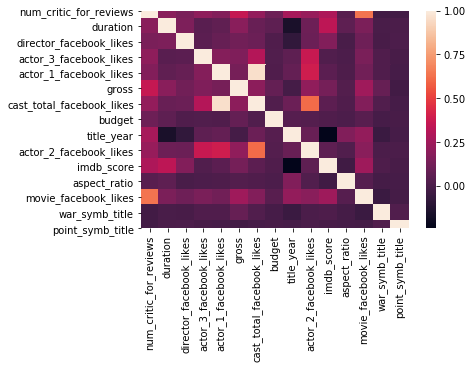

In [40]:
# table of corr
M = data.corr()
sbr.heatmap(M)

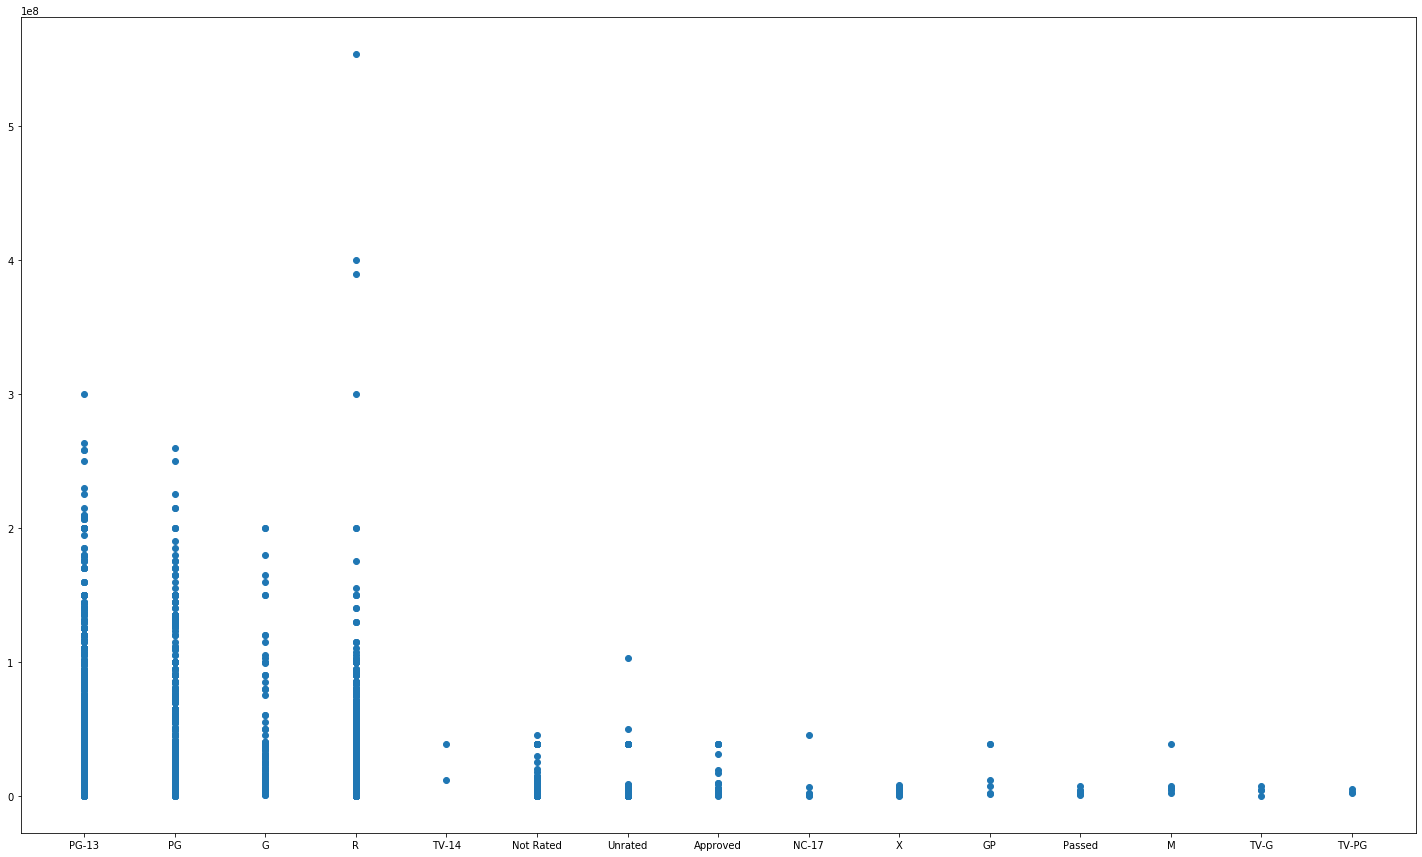

In [41]:
plt.figure(figsize=(25, 15))

data_b = data.dropna(subset = ['content_rating'])
data_b = data_b.drop(data_b[data_b['budget'] > (data_b['budget'].mean() +  3 * data_b['budget'].std()) ].index)
data_b = data_b.drop(data_b[data_b['budget'] < (data_b['budget'].mean() -  3 * data_b['budget'].std()) ].index)
plt.scatter(data_b['content_rating'],data_b['budget'])

In [42]:
data_corr = data.copy()
data_corr['content_rating'] = data_corr['content_rating'].astype(str)
data_corr['content_rating'] = le.fit_transform(data_corr['content_rating'])

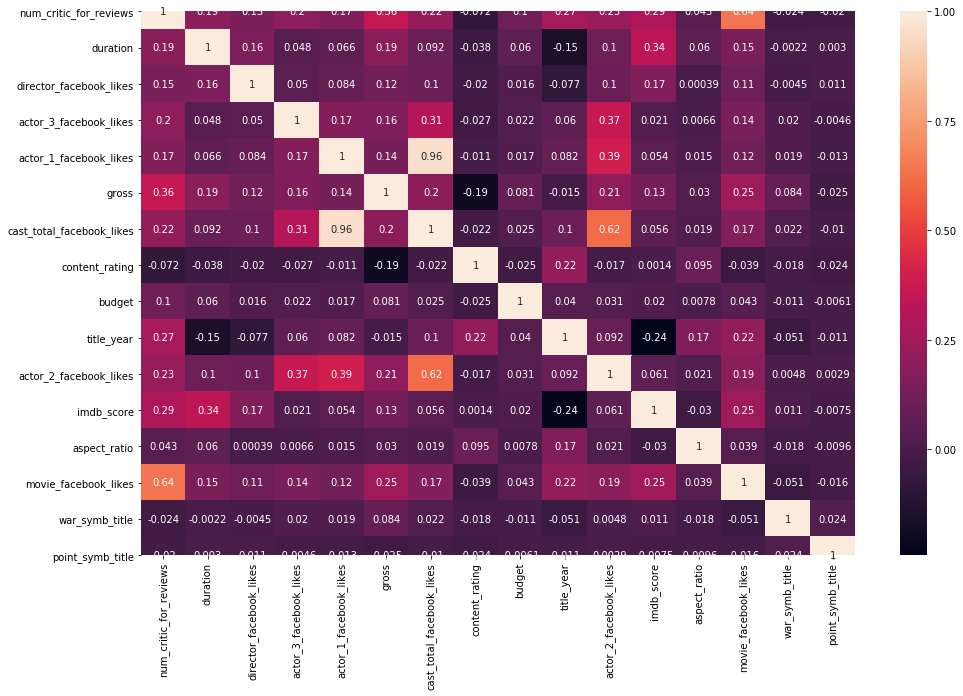

In [43]:
# let's see correlation table with content_rating
plt.figure(figsize=(16, 10))
M = data_corr.corr()
sbr.heatmap(M, cbar=True, annot=True)

In [44]:
#correlation is -0.024972
pearsoncorr = data_corr.corr(method='pearson')
pearsoncorr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
num_critic_for_reviews,1.000000,0.186474,0.146523,0.201549,0.167458,0.364706,0.218407,-0.071757,0.103147,0.268281,0.228168,0.289209,0.042986,0.639130,-0.023890,-0.019661
duration,0.186474,1.000000,0.156317,0.048195,0.066444,0.187209,0.091843,-0.037880,0.060319,-0.154587,0.104412,0.338319,0.059554,0.151011,-0.002161,0.003021
director_facebook_likes,0.146523,0.156317,1.000000,0.050019,0.083781,0.117877,0.101552,-0.019982,0.015999,-0.077335,0.100695,0.167700,0.000387,0.108458,-0.004520,0.010511
actor_3_facebook_likes,0.201549,0.048195,0.050019,1.000000,0.172773,0.158289,0.309648,-0.026800,0.021605,0.059601,0.367371,0.020662,0.006642,0.142490,0.019581,-0.004586
actor_1_facebook_likes,0.167458,0.066444,0.083781,0.172773,1.000000,0.135335,0.958543,-0.010721,0.017339,0.082310,0.389473,0.054166,0.014518,0.119154,0.018898,-0.012900
gross,0.364706,0.187209,0.117877,0.158289,0.135335,1.000000,0.195962,-0.189029,0.081180,-0.014828,0.206144,0.128701,0.029593,0.250173,0.084282,-0.024539
cast_total_facebook_likes,0.218407,0.091843,0.101552,0.309648,0.958543,0.195962,1.000000,-0.021613,0.025373,0.102457,0.615631,0.056459,0.018693,0.166982,0.021801,-0.010421
content_rating,-0.071757,-0.037880,-0.019982,-0.026800,-0.010721,-0.189029,-0.021613,1.000000,-0.024972,0.215726,-0.016874,0.001355,0.094935,-0.038703,-0.017720,-0.024271
budget,0.103147,0.060319,0.015999,0.021605,0.017339,0.081180,0.025373,-0.024972,1.000000,0.039663,0.031155,0.020374,0.007807,0.043162,-0.011356,-0.006090
title_year,0.268281,-0.154587,-0.077335,0.059601,0.082310,-0.014828,0.102457,0.215726,0.039663,1.000000,0.091741,-0.241272,0.166005,0.218755,-0.050761,-0.010974


In [45]:
newd = data.copy()
newd['color'] = newd['color'].astype(str)
newd['color'] = le.fit_transform(newd['color'])
newd.color.value_counts()

1    4451
0     204
2       9
Name: color, dtype: int64

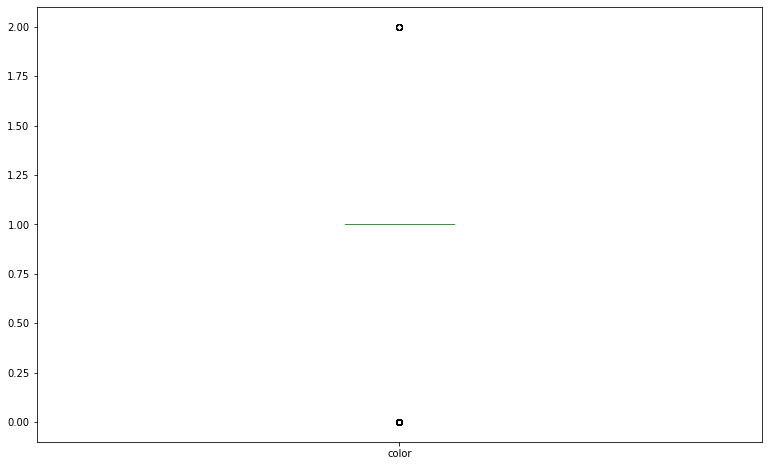

In [46]:
plt.figure(figsize=(13, 8))
box_d = newd.color
#normilized_box_d = box_d/box_d.max()
box_d.plot.box()